# Unzip de todos os ficheiros necessários para a realização dos exercícios da Parte 2

In [ ]:
import zipfile
with zipfile.ZipFile("Parte2.zip", 'r') as zip_ref:
    zip_ref.extractall()

# Instalação de todas as componentes necessárias

In [ ]:
!python -m spacy download pt_core_news_lg
!pip install xlsxwriter
!pip install jjcli
!pip install wordcloud
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.2/568.2 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 3.0 MB/s eta 0:00:00


# Importação de todas as bibliotecas necessárias

In [ ]:
import spacy
import pandas as pd
from matplotlib import pyplot as plt
from jjcli import *
from bs4 import BeautifulSoup as bs
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter

# Experiências realizadas na sala de aula





## Lei de Zipf ##

  A lei é uma lei empírica formulada utilizando estatísticas matemáticas,inicialmente proposta pelo linguísta George zipf na década de 1930, que afirma que num corpus de texto suficientemente grande, a frequência de uma palavra é inversamente proporcional à sua posição numa lista ordenada pela frequência.
 Simplificando, a segunda palavra mais frequente irá repetir-se aproximadamente com uma frequência que é a metade da frequência da primeira palavra, a terceira palavra mais frequente irá repetir-se um terço da frequência da primeira palavra, e assim por diante.

                                                       zipf(a, size=None)


 ### Parâmetros

A variável "**a**" refere-se ao parâmetro de distribuição de **float** ou **array_like of floats** e este tem que ser maior que um ( a > 1).


A variável "**size**" integra int ou tupla de ints, com uma forma de output opcional. O **default** é** none**.

Exemplo:
Dada a forma "**(1,2,3)"**, é feito então o cálculo "**(1 * 2 * 3)**"

Aplicar a Lei de Zipf na Linguística e Processamento de Linguagem Natural é importante pois ajuda a compreender a distribuição de palavras num corpus de texto grande. Assim, um gráfico que pode parecer bastante desproporcional e de difícil visualização é simplificado de forma a ser possível estudá-lo com mais clareza.





##Exemplo da aplicação da Lei de Zipf

De forma a ser aplicada esta teoria, foi usada uma lista de topónimos presentes nos assentos de batismo de Favaios de 1907 e de seguida foi avaliada a frequência das palavras.

In [ ]:
# Assumindo que temos a lista dos topónimos presentes nos assentos de batismo de Favaios de 1907
toponimos_freq = [('Alijó', 68), ('Lamego', 60), ('Favaios', 59), ('Soutellinho', 15), ('Mondego', 5), ('Rezende', 3), ('São Martinho de Mouros', 3), ('Cottas', 2), ('Granja', 2), ('Nogueiras', 2), ('Almacave ', 1), ('Ferreirim', 1), ('Moimenta da Beira', 1), ('Montalegre', 1), ('Presendães', 1), ('Sanradella', 1), ('São João da Pesqueira', 1), ('São João de Tavora', 1), ('São Mamede', 1), ('Taboaço', 1), ('Villar de Maçada', 1)]

def create_zipf_table(frequencies):
    zipf_table = []

    top_frequency = frequencies[0][1]

    for index, item in enumerate(frequencies, start=1):

        relative_frequency = "1/{}".format(index)
        zipf_frequency = top_frequency * (1 / index)
        difference_actual = item[1] - zipf_frequency
        difference_percent = (item[1] / zipf_frequency) * 100

        zipf_table.append({"word": item[0],
                           "actual_frequency": item[1],
                           "relative_frequency": relative_frequency,
                           "zipf_frequency": zipf_frequency,
                           "difference_actual": difference_actual,
                           "difference_percent": difference_percent})

    return zipf_table

def print_zipf_table(zipf_tabl):
    width = 93

    print("-" * width)
    print("|Rank|      Word               |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|")
    print("-" * width)

    format_string = "|{:4}|{:25}|{:12.0f}|{:>12}|{:12.2f}|{:12.2f}|{:7.2f}%|"

    for index, item in enumerate(zipf_table, start=1):

        print(format_string.format(index,
                                   item["word"],
                                   item["actual_frequency"],
                                   item["relative_frequency"],
                                   item["zipf_frequency"],
                                   item["difference_actual"],
                                   item["difference_percent"]))

    print("-" * width)


zipf_table = create_zipf_table(toponimos_freq)
print_zipf_table(zipf_table)

---------------------------------------------------------------------------------------------
|Rank|      Word               |Actual Freq | Zipf Frac  | Zipf Freq  |Actual Diff |Pct Diff|
---------------------------------------------------------------------------------------------
|   1|Alijó                    |          68|         1/1|       68.00|        0.00| 100.00%|
|   2|Lamego                   |          60|         1/2|       34.00|       26.00| 176.47%|
|   3|Favaios                  |          59|         1/3|       22.67|       36.33| 260.29%|
|   4|Soutellinho              |          15|         1/4|       17.00|       -2.00|  88.24%|
|   5|Mondego                  |           5|         1/5|       13.60|       -8.60|  36.76%|
|   6|Rezende                  |           3|         1/6|       11.33|       -8.33|  26.47%|
|   7|São Martinho de Mouros   |           3|         1/7|        9.71|       -6.71|  30.88%|
|   8|Cottas                   |           2|         1/8|  

**Explicação dos resultados**

**Palavras com Frequência Maior que a Esperada:**

Favaios (Rank 4, Actual Freq: 59, Zipf Freq: 17.00, Pct Diff: 347.06%): Esta palavra aparece muito mais frequentemente do que o previsto pela Lei de Zipf.

Lamego (Rank 7, Actual Freq: 60, Zipf Freq: 9.71, Pct Diff: 617.65%): Também aparece com uma frequência significativamente maior do que a prevista.

Soutellinho (Rank 15, Actual Freq: 15, Zipf Freq: 4.53, Pct Diff: 330.88%): A frequência é muito maior do que a esperada.

**Palavras com Frequência Menor que a Esperada:**

Almacave (Rank 2, Actual Freq: 1, Zipf Freq: 34.00, Pct Diff: 2.94%): A frequência real é muito menor do que a esperada.

Ferreirim (Rank 5, Actual Freq: 1, Zipf Freq: 13.60, Pct Diff: 7.35%): Também tem uma frequência bem menor do que a prevista.

Palavras como "Almacave" e "Ferreirim" aparecem com muito menos frequência do que a Lei de Zipf prevê, o que pode ocorrer devido a particularidades do texto ou contexto específico onde essas palavras são menos relevantes. Assim sendo, estas palavras são consideradas **sub-representadas**.

 Palavras como "Favaios" e "Lamego" aparecem muito mais frequentemente do que o esperado, sugerindo que essas palavras têm uma importância particular no contexto do texto. Assim, estas palavras são consideradas **super-representadas**.

##Comparação entre a frequência real e a frequência de Zipf

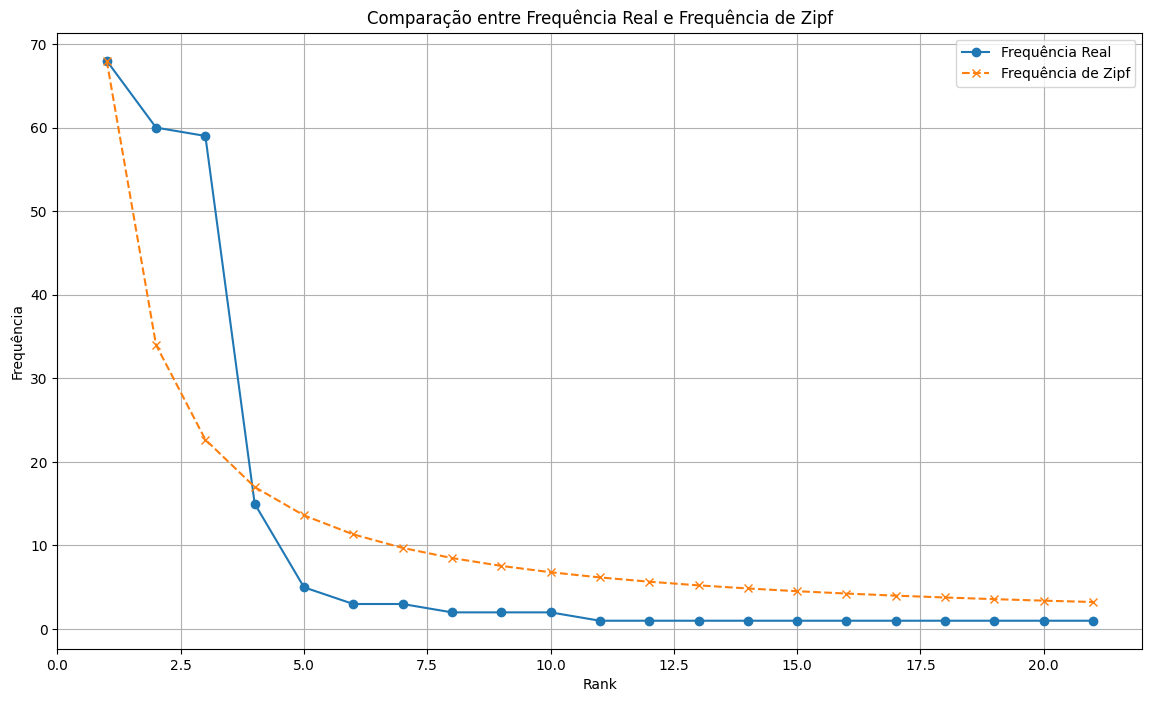

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados fornecidos
data = {
    'Rank': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'Word': ['Alijó', 'Lamego', 'Favaios', 'Soutellinho', 'Mondego', 'Rezende', 'São Martinho de Mouros', 'Cottas',
             'Granja', 'Nogueiras', 'Almacave', 'Ferreirim', 'Moimenta da Beira', 'Montalegre', 'Presendães',
             'Sanradella', 'São João da Pesqueira', 'São João de Tavora', 'São Mamede', 'Taboaço', 'Villar de Maçada'],
    'Actual Freq': [68, 60, 59, 15, 5, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Zipf Freq': [68.00, 34.00, 22.67, 17.00, 13.60, 11.33, 9.71, 8.50, 7.56, 6.80, 6.18, 5.67, 5.23, 4.86, 4.53, 4.25, 4.00, 3.78, 3.58, 3.40, 3.24]
}

# Cria DataFrame
df = pd.DataFrame(data)

# Cria o gráfico
plt.figure(figsize=(14, 8))
plt.plot(df['Rank'], df['Actual Freq'], marker='o', label='Frequência Real')
plt.plot(df['Rank'], df['Zipf Freq'], marker='x', label='Frequência de Zipf', linestyle='--')
plt.xlabel('Rank')
plt.ylabel('Frequência')
plt.title('Comparação entre Frequência Real e Frequência de Zipf')
plt.legend()
plt.grid(True)
plt.show()



## Extração e contagem de Lemas

o Artigo sobre Alfredo Guisado e como este levou Fernando Pessoa a conhecer Galiza, realizado por Nuno Passos no jornal online Uminho foi analisado.

Primeiramente este artigo foi convertido para um ficheiro **md**. De seguida foi realizado um código para normalizar ou apagar o que era considerado indesejável (apagar espaços no início da linha, substituir três espaços por apenas um, etc). De seguida foram procuradas as entidades e o lema dos verbos, bem como a quantidade de vezes que estes surgem. Esta informação foi posteriormente colocada em excel, contendo assim os adjetivos, verbos, nomes de pessoas e de lugares e o número de ocorrências de cada palavra.



In [ ]:
file = open("Parte2/Output/output_2136.md", "r", encoding='utf8')
text = file.read()

def main():
    verbos = procVerbos(text)
    toponimos = procToponimos(text)
    nomes_proprios = procNomesProprios(text)
    adjetivos = procAdjetivos(text)
    adverbios = procAdverbios(text)
    contagemExcel(verbos, toponimos, nomes_proprios, adjetivos, adverbios)
    return {'Verbos': len(verbos), 'Topónimos': len(toponimos),
     'Nomes Próprios': len(nomes_proprios), 'Adjetivos': len(adjetivos), 'Advérbios': len(adverbios)}


def procVerbos(texto):
     verbos=[]
     nlp=spacy.load("pt_core_news_lg")
     doc=nlp(texto)
     for pal in doc:
         if pal.pos_=='VERB':
            verbos.append(pal.lemma_)
     print(f"{len(verbos)}\n{verbos}\n\n")
     return verbos

def procNomesProprios(texto):
     nomesProprios=[]
     nlp=spacy.load("pt_core_news_lg")
     doc=nlp(texto)
     for ent in doc.ents:
         if ent.label_=='PER':
            nomesProprios.append(ent.text)
     print(f"{len(nomesProprios)}\n{nomesProprios}\n\n")
     return nomesProprios

def procToponimos(texto):
     toponimos=[]
     nlp=spacy.load("pt_core_news_lg")
     doc=nlp(texto)
     for ent in doc.ents:
         if ent.label_=='LOC':
            toponimos.append(ent.text)
     print(f"{len(toponimos)}\n{toponimos}\n\n")
     return toponimos

def procAdjetivos(texto):
     adjetivos=[]
     nlp=spacy.load("pt_core_news_lg")
     doc=nlp(texto)
     for pal in doc:
         if pal.pos_=='ADJ':
            adjetivos.append(pal.lemma_)
     print(f"{len(adjetivos)}\n{adjetivos}\n\n")
     return adjetivos

def procAdverbios(texto):
     adverbios=[]
     nlp=spacy.load("pt_core_news_lg")
     doc=nlp(texto)
     for pal in doc:
         if pal.pos_=='ADV':
            adverbios.append(pal.lemma_)
     print(f"{len(adverbios)}\n{adverbios}\n\n")
     return adverbios


def contagemExcel(verbos, toponimos, nomesProprios, adjetivos, adverbios):

     frequencia_absoluta_verbos = pd.Series(verbos).value_counts()              #Frequência de cada classe gramatical
     frequencia_absoluta_toponimos = pd.Series(toponimos).value_counts()
     frequencia_absoluta_nomesProprios = pd.Series(nomesProprios).value_counts()
     frequencia_absoluta_adjetivos = pd.Series(adjetivos).value_counts()
     frequencia_absoluta_adverbios = pd.Series(adverbios).value_counts()

     df_verbos = pd.DataFrame({'Verbos': frequencia_absoluta_verbos.index, 'Total de Verbos': frequencia_absoluta_verbos.values})
     df_toponimos = pd.DataFrame({'Topónimos': frequencia_absoluta_toponimos.index, 'Total de Topónimos': frequencia_absoluta_toponimos.values})
     df_nomesProprios = pd.DataFrame({'Nomes Próprios': frequencia_absoluta_nomesProprios.index, 'Total de Nomes Próprios': frequencia_absoluta_nomesProprios.values})
     df_adjetivos = pd.DataFrame({'Adjetivos': frequencia_absoluta_adjetivos.index, 'Total de Adjetivos': frequencia_absoluta_adjetivos.values})
     df_adverbios = pd.DataFrame({'Advérbios': frequencia_absoluta_adverbios.index, 'Total de Advérbios': frequencia_absoluta_adverbios.values})   #Converte para Dataframe

     # Juntar a nova coluna ao DataFrame original usando merge
     df_merge_1 = pd.merge(df_verbos, df_toponimos, left_index=True, right_index=True, how="outer")
     df_merge_2 = pd.merge(df_merge_1, df_nomesProprios, left_index=True, right_index=True, how="outer")
     df_merge_3 = pd.merge(df_merge_2, df_adjetivos, left_index=True, right_index=True, how="outer")
     df_merge_4 = pd.merge(df_merge_3, df_adverbios, left_index=True, right_index=True, how="outer")

     with pd.ExcelWriter('Contagens.xlsx') as writer:
          df_merge_4.to_excel(writer, index=False, sheet_name='Contagens')   #converte para um ficheiro excel

          workbook = writer.book
          centrar = workbook.add_format({'align': 'center', 'valign': 'vcenter'})   #centrar os nomes das colunas

          # Definir o tamanho da coluna A como 20
          worksheet = writer.sheets['Contagens']
          worksheet.set_column('A:A', 20, centrar)
          worksheet.set_column('B:B', 20, centrar)
          worksheet.set_column('C:C', 20, centrar)
          worksheet.set_column('D:D', 20, centrar)
          worksheet.set_column('E:E', 20, centrar)
          worksheet.set_column('F:F', 20, centrar)
          worksheet.set_column('G:G', 20, centrar)
          worksheet.set_column('H:H', 20, centrar)
          worksheet.set_column('I:I', 20, centrar)
          worksheet.set_column('J:J', 20, centrar)

contagens = main()

90
['levar', 'http://www.nos.uminho.pt/Article.aspx?id=2136', 'levar', 'levar', 'publicar', 'pensar', 'surgir', 'servia', 'haver', 'definir', 'juntar', 'obter', 'editar', 'ter', 'tratar', 'entender', 'acabar', 'sair', 'baseia-se', 'assinar', 'contribuir', 'enobrecer', 'iniciar', 'realçar', 'contextualizar', 'atingir', 'haver', 'cruzar', 'crer', 'contribuí', 'conhecer', 'entender', 'ter', 'atuar', 'frisar', 'multifacetar', 'centrar se', 'ter', 'intervir', 'vincar', 'chegar', 'eleger', 'espelhar', 'conquistar', 'dizer', 'ter', 'lançar', 'trabalhar', 'opôs-se', 'prender', 'elogiar', 'haver', 'dever', 'ter', 'ganhar', 'nascer', 'exercer', 'presidir', 'sensibilizar', 'realizar', 'Guisado', 'ir', 'imagine-se', 'perceber', 'secundarizar', 'ficar', 'elogiar ele', 'imaginar', 'incluír', 'seguir', 'pisar', 'poetar', 'evocar', 'recordar', 'decidir', 'abordar', 'estudar', 'marcar', 'apaixonar', 'Teve', 'acolhir', 'navegar', 'resumir', 'dedicar', 'acompanhar', 'doutorar', 'pós-graduar', 'licenciar'

##

###Gráfico de frequência de cada tipo de palavra

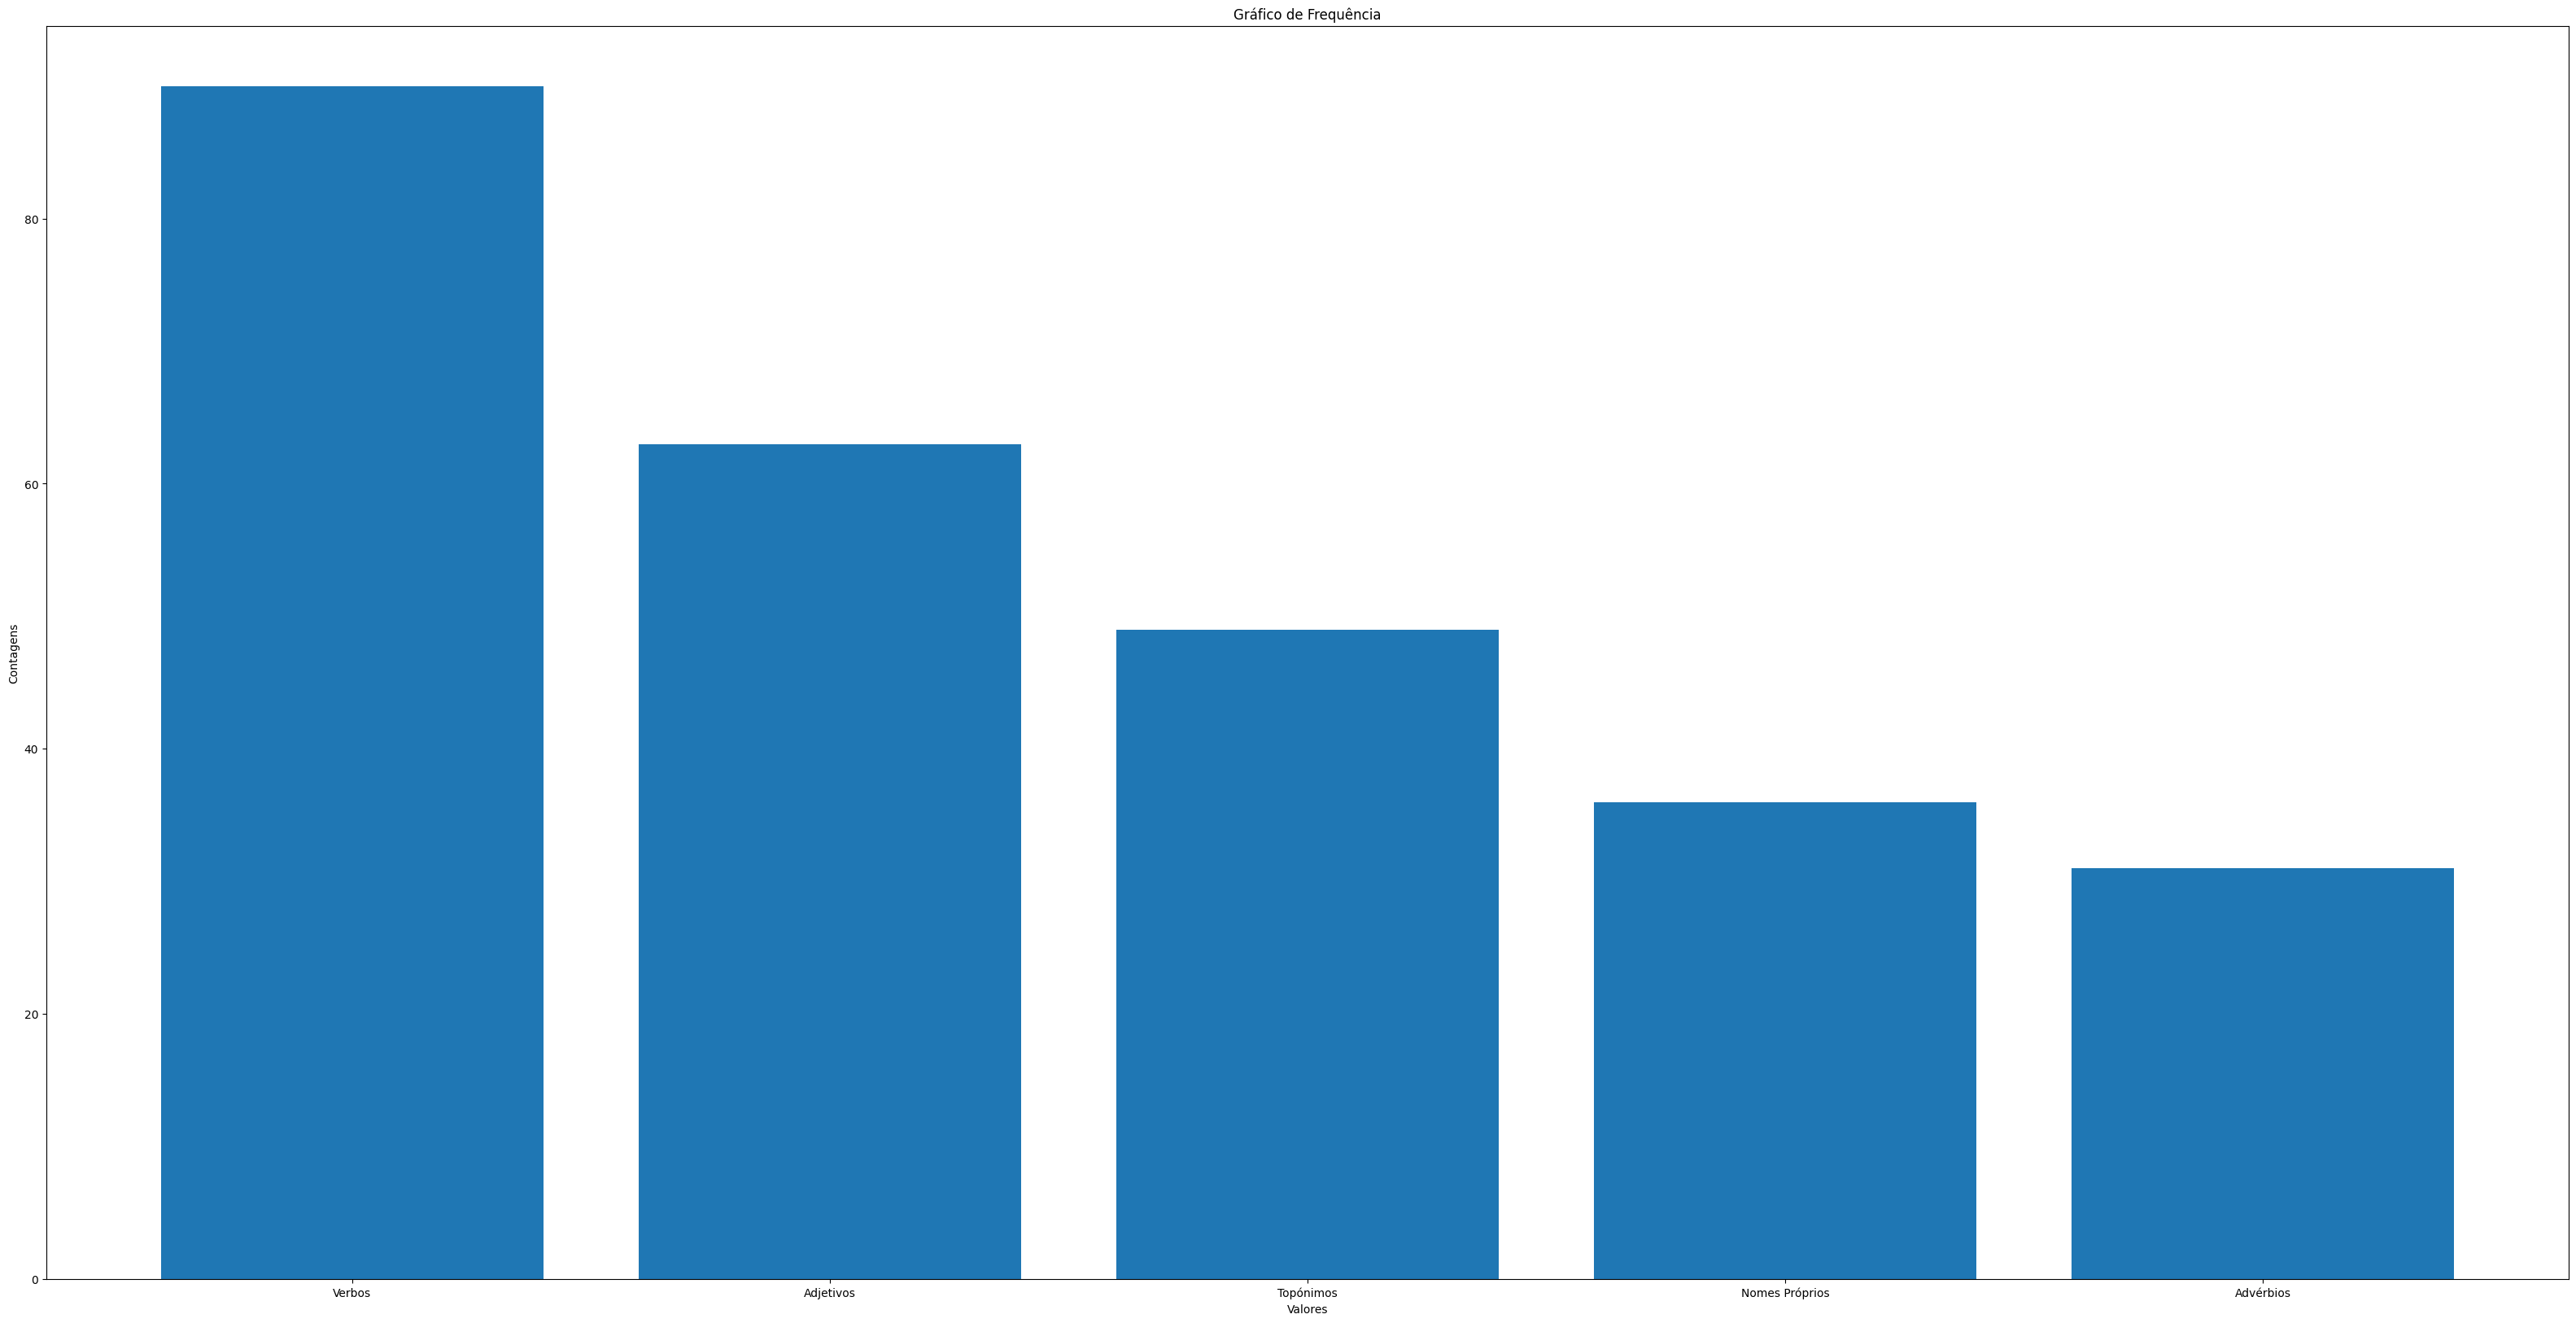

In [ ]:
sorted_contagens = dict(sorted(contagens.items(), key=lambda item: item[1], reverse=True))

# Extrai as chaves e os valores do dicionário
valores = list(sorted_contagens.keys())
contagens = list(sorted_contagens.values())

plt.figure(figsize=(40, 20))

# Cria o gráfico de barras
plt.bar(valores, contagens)

# Adiciona rótulos e título
plt.xlabel('Valores')
plt.ylabel('Contagens')
plt.title('Gráfico de Frequência')

# Exibe o gráfico
plt.show()

## Abrir o ficheiro excel para mostrar os resultados

In [ ]:
df_contagens = pd.read_excel('Contagens.xlsx', sheet_name='Contagens')
df_contagens

,Verbos,Total de Verbos,Topónimos,Total de Topónimos,Nomes Próprios,Total de Nomes Próprios,Adjetivos,Total de Adjetivos,Advérbios,Total de Advérbios
0,ter,5,Galiza,9.0,Orpheu,4.0,cultural,5.0,também,4.0
1,haver,3,Guisado,5.0,Alfredo Guisado,3.0,galego,5.0,injustamente,2.0
2,levar,3,Lisboa,4.0,Carlos Pazos,3.0,literário,3.0,só,2.0
3,entender,2,Pazos,3.0,Fernando Pessoa,2.0,primeiro,3.0,generosamente,2.0
4,ganhar,1,rio Minho,2.0,Carlos Pazos Justo,2.0,último,2.0,não,2.0
...,...,...,...,...,...,...,...,...,...,...
76,atuar,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,conhecer,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,contribuí,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,crer,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


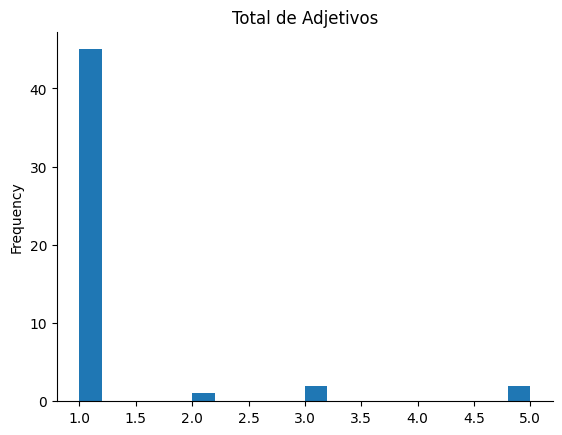

In [ ]:
df_contagens['Total de Adjetivos'].plot(kind='hist', bins=20, title='Total de Adjetivos')
plt.gca().spines[['top', 'right',]].set_visible(False)

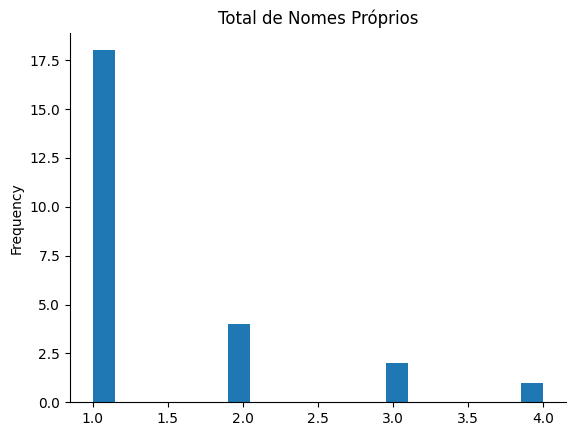

In [ ]:
df_contagens['Total de Nomes Próprios'].plot(kind='hist', bins=20, title='Total de Nomes Próprios')
plt.gca().spines[['top', 'right',]].set_visible(False)

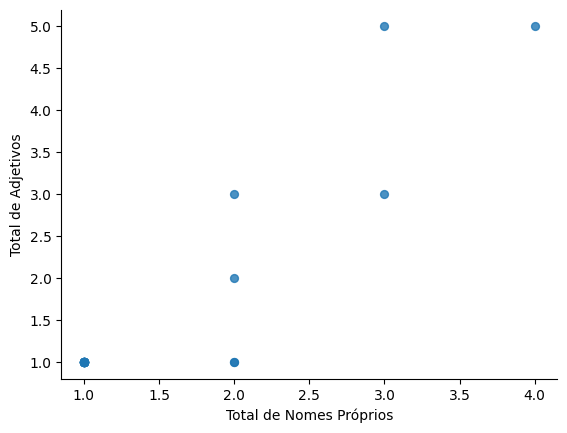

In [ ]:
df_contagens.plot(kind='scatter', x='Total de Nomes Próprios', y='Total de Adjetivos', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

**Explicação do gráfico**

 O gráfico seguinte é denominado de gráfico de dispersão, que compara o "Total de Nomes Próprios" (eixo X)  com o "Total de Adjetivos" (eixo y).
Cada ponto no gráfico representa uma observação onde a coordenada X é o número total de nomes próprios e a coordenada Y é o número total de adjetivos nessa observação.

Em geral, a frequência de adjetivos é relativamente a mesma em relação à frequência de nomes próprios, sendo que quando existem poucos nomes próprios a quantidade de adjetivos é menor e quando há um maior surgimento de nomes próprios há um aumento também dos adjetivos.
O estudo desta relação pode revelar-se pertinente para estudar por exemplo o tipo de escrita do autor, que neste caso realiza "descrições" com a mesma frequência que menciona identidades.


## Organização de um Dataset: Estratégias e Considerações Essenciais

Quando se trata de organizar um dataset, é crucial considerar vários aspetos para garantir que os dados são úteis, precisos e facilmente acessíveis:


*   O primeiro passo é garantir que os dados estão limpos, o que envolve a **remoção de valores** que podem surgir duplicados, a **correção de erros** e a **padronização de formatos de dados**, como datas e números, de forma a evitar inconsistências.
*   Outro ponto importante é a estruturação dos dados de forma lógica e intuitiva, o que pode eventualmente envolver a definição de um esquema claro para um banco de dados. Os nomes das colunas e arquivos devem ser descritivos e seguir uma convenção de nomenclatura consistente.


*  A documentação é essencial durante a organização de um dataset. Incluir metadados detalhados que descrevam cada variável, as suas unidades de medida, e qualquer transformação aplicada aos dados, ajuda outros utilizadores a entenderem o contexto e a utilizarem os dados corretamente.
*   Outro aspecto a considerar é a integridade dos dados, sendo que é importante verificar a presença de dados ausentes e decidir como lidar com eles, seja através de imputação(colocação), remoção ou sinalização de dados incompletos. Ademais, garantir que as relações entre diferentes partes do dataset sejam mantidas corretamente, especialmente em bases de dados relacionais, é fundamental para preservar a precisão das análises.


*   A segurança dos dados também não pode ser negligenciada. Desta forma, garantir que os dados sensíveis estão protegidos e que apenas utilizadores com a devida autorização têm acesso a informações confidenciais é crucial de forma a evitar violações de privacidade e manter a conformidade com regulamentos de proteção de dados.
*   A escalabilidade do dataset é bastante importante, especialmente se continuar a crescer ao longo do tempo. Assim, planear uma estrutura é essencial para a manuntenção a longo prazo, de forma a permitir a adição de novos dados sem comprometer a organização ou a performance do sistema.

### Organização dos Dados dos Artigos ComUm

De forma a organizar os dados presentes nos artigos ComUM foi feito um código python em contexto de sala de aula de forma a organizar as informações, sendo que este código foi ligeiramente adptado devido ao formato dos artigos ser HTML.
Foi inicialmente feita uma contagem dos caracteres de cada artigo para referência e de seguida foi realizada uma árvore documental que usa o BeautifulSoup. Após isto foi feita uma entração de dados específicos, como data e imagens, bem como uma limpeza e estruturação de conteúdo, em que elementos desnecessários são removidos e é feita uma organização do conteúdo num cabeçalho estruturado. Tudo isto é imprimido num arquivo de saída.

Este processo garante que os dados sejam extraídos e estruturados de forma coerente, permitindo análises subsequentes ou uso em outras aplicações.

### Estrutura do Arquivo de Saída

O **cabeçalho do artigo** contém metadados extraídos das tags \<meta> , que incluem datas extraídas e URLs de imagens contidas nos arquivos
O **texto principal** do artigo exttraído com id="artigo" contém o texto principal após a remoção de elementos de navegação indesejados.
As principais etiquetas extraidas foram por exemplo \<og> e \<article> .










In [ ]:
ats=glob("Parte2/Artigos_ComUM/*.html")
print(ats)

fo=open("saida.txt" , "w", encoding="utf-8")

def proc_article (html):
    print (len(html)) #Conta os caracteres de cada artigo
    a=bs(html) #Cria uma árvore documental
    cabecalho=""
    art= a.find("div", id="artigo") #procura

    # Procurar e extrair as datas, colocando-as no cabeçalho
    try:
      obter_data=art.find("span", id="ctl00_ContentPlaceHolder1_LabelInfo").text # obter o span de id ctl00_ContentPlaceHolder1_LabelInfo
      extrair_data=obter_data[:10] # obter os 10 primeiros caracteres que correspondem à data
      cabecalho += f"{extrair_data}\n" # colocar as datas no cabeçalho
    except:
      None


    # Procurar e extrair as imagens, colocando-as no cabeçalho
    try:
      obter_slides = art.find("div", {'id':'slides'}) # ir ao div de id slides pois contém todas as imagens que queremos
      if obter_slides is not None: # caso exista div de id slides procurar pelas imagens
        for slide in obter_slides.find_all("div", {'class':'slide'}): # percorrer todos os div class slide pois contém todas as imagens que queremos
          imagem = slide.find('img') # obter a imagem
          cabecalho += f"{imagem['src']}\n" # adicionar imagem ao cabeçalho
    except:
      None

    # Colocar depois do cabeçalho (---)
    cabecalho += "---\n" # colocar os ---

    for meta in a.find_all("meta"):
        p =meta.get("property")
        if p is None:
            continue
        p.replace("og" , "")
        cabecalho+=f"{p}: {meta.get('content')}\n"
       # print(p, ":" , meta.get("content"))

    # Função limpeza (remover o "voltar à pagina anterior")
    try:
      for div in art.find_all("div", {'class':'voltar'}): # percorrer todos os div class voltar pois contém voltar ao inicio
          div.decompose() # apaga os voltar ao inicio
    except:
      None

    try:
      print("==========\n", cabecalho , art.get_text(), file =fo)
    except:
      print("==========\n", cabecalho, file =fo)

for file in ats:
    with open (file, encoding="utf-8") as f:
        html=f.read()
    proc_article(html)

['Parte2/Artigos_ComUM/uminho-uporto-e-utad-realizam-1a-convencao-psicologia-unorte.html', 'Parte2/Artigos_ComUM/estudantes-da-uminho-recebem-premios-de-merito-desportivo.html', 'Parte2/Artigos_ComUM/assedio-na-uminho-reitor-garante-procedimentos-de-averiguacao_NR36.html', 'Parte2/Artigos_ComUM/antigo-aluno-da-uminho-cria-google-maps-do-cerebro_NR15.html', 'Parte2/Artigos_ComUM/uminho-e-das-primeiras-universidades-a-ser-abrangida-pelo-plano-de-recuperacao-e-resiliencia.html', 'Parte2/Artigos_ComUM/imposicao-de-insignias-2023-o-final-de-uma-era-para-o-comeco-de-outra.html', 'Parte2/Artigos_ComUM/aaum-escolhe-afonsina-para-atuar-nas-serenatas-velhas.html', 'Parte2/Artigos_ComUM/49-anos-da-uminho-rui-vieira-de-castro-acredita-numa-instituicao-capaz-de-criar-oportunidades_NR55.html', 'Parte2/Artigos_ComUM/semana-da-euforia-2024-mais-um-ano-de-festa_NR252.html', 'Parte2/Artigos_ComUM/aedum-acusa-ordem-dos-advogados-de-dificultar-acesso-a-profissao.html', 'Parte2/Artigos_ComUM/aumento-das-se

## Análise de Sentimentos do livro "Harry Potter e a Pedra Filosofal"

In [ ]:
def calcula_sentimento(texto):
    analysis = TextBlob(chapter)

    # Verifica o sentimento da frase
    if analysis.sentiment.polarity > 0:
        sentiment = "Positivo"
    elif analysis.sentiment.polarity < 0:
        sentiment = "Negativo"
    else:
        sentiment = "Neutro"

    return sentiment, analysis.sentiment.polarity

hp_file = open("Parte2/HarryPotter/HP.txt", "r", encoding="utf8").read()
hp_chapters = hp_file.split("#")                              #Divide por capitulos, através do cardinal (#)
results = ""

# Realiza a análise de sentimentos
for chapter in hp_chapters:                                              # Analisa os sentimentos por capitulo
    sentiment_chapter, analysis_chapter = calcula_sentimento(chapter)
    chapter_number = chapter.splitlines()[0].replace(' ', '')               #O número de capitulo, sem espaços

    if '-' in chapter_number:
        results += "Introdução\n"                                           #Caso tenha um traço é uma introdução, não um capitulo
       # print(f"Introdução")
    else:
        results += "Capítulo " + chapter_number + "\n"                      #Dá print do número do capitulo
       # print(f"Capítulo {chapter_number}")

    results += "Sentimento: " + sentiment_chapter + "\n"
    #print(f"Sentimento: {sentiment_chapter}")                             #Print dos sentimentos

    results += "Polaridade do Sentimento: " + str(analysis_chapter) + "\n"
    #print(f"Polaridade do Sentimento: {analysis_chapter}")                    #Print da polaridade
    print(f"{chapter_number} , {analysis_chapter}")
   # results += "-" * 50 + "\n"                                           #Print dos traços para dividir os resultados
   # print("-" * 50)

sentiment_book, analysis_book = calcula_sentimento(hp_file)                 #Calculo do livro todo

results += "Livro completo\n"
print(f"Livro completo")

results += "Sentimento: " + sentiment_book + "\n"
print(f"Sentimento: {sentiment_book}")

results += "Polaridade do Sentimento: " + str(analysis_book) + "\n"
print(f"Polaridade do Sentimento: {analysis_book}")

results += "-" * 50
print("-" * 50)


with open("resultados.txt", "w") as file1:
    file1.write(results)
                                                          #Guardar os resultados num ficheiro
file1.close

--- , 0.1875
I , -0.14776475694444444
II , -0.125
III , 0.1025
IV , -0.26187499999999997
V , -0.023214285714285694
VI , 0.182220458984375
VII , 0.11313225746154784
VIII , -0.5
IX , 0.55
X , 0.11393229166666667
XI , 0.1375
XII , 0.1476837158203125
XIII , 0.14091331845238098
XIV , -0.16406249999999997
XV , -0.3236368815104167
XVI , -0.29556961059570314
XVII , -0.02938232421875
Livro completo
Sentimento: Negativo
Polaridade do Sentimento: -0.02938232421875
--------------------------------------------------


<function TextIOWrapper.close()>

Explicação do código


Este código realiza uma análise de sentimentos do livro "Harrry Potter e a Pedra Filosofal" , capítulo por capítulo, utilizando a biblioteca TextBlob.
A função calcula_sentimento recebe um texto, analisa o sentimento usando o TextBlob e retorna tanto a polaridade do sentimento quanto uma classificação ("Positivo", "Negativo" ou "Neutro").
Para cada capítulo, é assim calculado o sentimento e a polaridade. É identificado o número do capítulo e a introdução. São adicionadas informações de sentimento ao string results e é imprimido o número do capítulo e a sua polaridade.
Os resultados de cada capítulo podem ser observados e segundo esta biblioteca de análise de sentimentos, o livro completo possuí um sentimento negativo, de polaridade -0.029


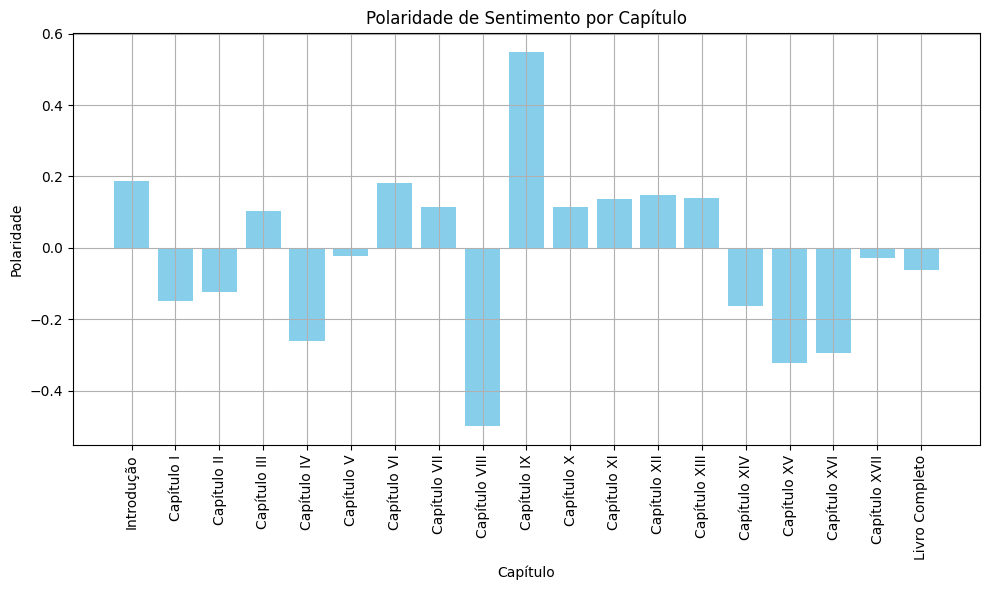

In [ ]:
def calcula_sentimento(texto):
    analysis = TextBlob(texto)

    # Verifica o sentimento da frase
    if analysis.sentiment.polarity > 0:
        sentiment = "Positivo"
    elif analysis.sentiment.polarity < 0:
        sentiment = "Negativo"
    else:
        sentiment = "Neutro"

    return sentiment, analysis.sentiment.polarity

# Leitura do arquivo do livro
hp_file = open("Parte2/HarryPotter/HP.txt", "r", encoding="utf8").read()
hp_chapters = hp_file.split("#")
results = []

# Realiza a análise de sentimentos por capítulo
for chapter in hp_chapters:
    sentiment_chapter, analysis_chapter = calcula_sentimento(chapter)
    chapter_number = chapter.splitlines()[0].replace(' ', '')

    if '-' in chapter_number:
        chapter_number = "Introdução"
    else:
        chapter_number = "Capítulo " + chapter_number

    results.append((chapter_number, sentiment_chapter, analysis_chapter))

# Adiciona a análise de sentimentos do livro completo
sentiment_book, analysis_book = calcula_sentimento(hp_file)
results.append(("Livro Completo", sentiment_book, analysis_book))

# Cria um DataFrame para armazenar os resultados
df = pd.DataFrame(results, columns=["Capítulo", "Sentimento", "Polaridade"])

# Gráfico de barras da polaridade por capítulo
plt.figure(figsize=(10, 6))
plt.bar(df["Capítulo"], df["Polaridade"], color='skyblue')
plt.xlabel('Capítulo')
plt.ylabel('Polaridade')
plt.title('Polaridade de Sentimento por Capítulo')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()



#  Sentilex


Sentilex foi um corpus usado de forma a obtermos extrações de sentimentos negativos e positivos, com as respetivas palavras que possuem conotação negativa ou positiva.

Assim, após os códigos que serão mostrados a seguir, são gerados os resultados num documento txt.




## Método que gera os ficheiros de sentimentos positivos e negativos através do Sentilex

In [ ]:
def gera_negativos_positivos(ficheiro):
    with open(ficheiro, 'r') as f:
        for linha in f:
            if "POL:N0=-1" in linha:
                word = linha.split("POL:N0-=1")[0].strip().split(",")[0]
                with open('negativos.txt', 'a') as file:
                    file.write(word + '\n')
            elif "POL:N0=1" in linha:
                word = linha.split("POL:N0=1")[0].strip().split(",")[0]
                with open('positivos.txt', 'a') as file:
                    file.write(word + '\n')

In [ ]:
gera_negativos_positivos("Parte2/Sentilex/sentilexjj.txt")

## Método que gera a núvem de palavras consoante o ficheiro

In [ ]:
def generate_wordcloud(ficheiro):
  with open(ficheiro, 'r') as file:
    texto = file.read()

  words = texto.splitlines()
  texto_minusculas = texto.lower()

  # Contagem da frequência de palavras que são negativas
  word_counts = Counter(texto_minusculas.split())
  negative_counts = {word: word_counts[word] for word in words if word in word_counts}

  # Nuvém de palavras
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_counts)

  # Criação da nuvém de palavras
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

### Gerar núvem de palavras dos sentimentos negativos

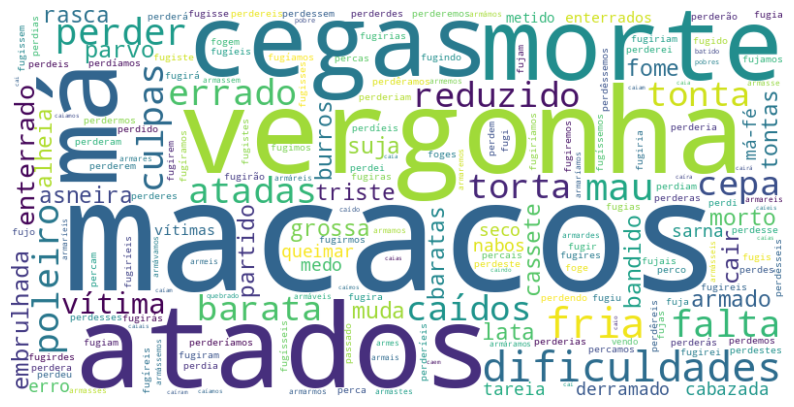

In [ ]:
generate_wordcloud('negativos.txt')

### Gerar núvem de palavras dos sentimentos positivos

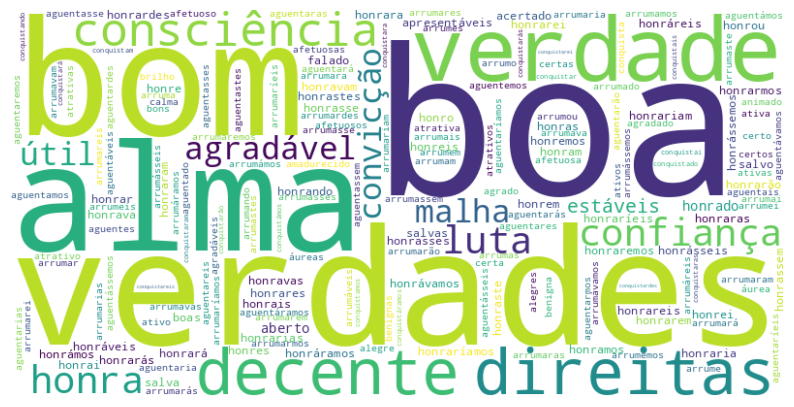

In [ ]:
generate_wordcloud('positivos.txt')